# 分散，標準偏差，四分位，パーセンタイルについて理解する(2022/01/07)
---
## 概要
---
タイトルにある4つの統計量について，それぞれの性質を調べ，Pythonの実装を行った．
各統計量の概説は以下

| 名称(英語表記) | よく使われる記号 | 概説 |
| :--- | :---: | ---: |
| 分散(variance) | $\sigma^2$(母集団), $s^2$(標本) | データの「ばらつき」を表す |
| 標準偏差(standard deviation) | $\sigma$(母集団), $s$(標本) | データの「ばらつき」を表す |
| 四分位(quartile) | $Q_1, Q_2, Q_3$ | データを4等分したときの「境目」 |
| パーセンタイル(percentile) |  | パーセントの比で分けたときの「境目」(四分位の一般化) |


## 分散
---
分散はその名の通り，「データがどれだけ散らばっているか」を定量的に表せる統計量である．具体的にはデータの平均値を基準として，どれだけデータの値が基準から離れているかを表している．$n$個のデータからなる特徴量の集合を${x_1, x_2, x_3, ...,x_n}$とするとき，(標本)分散は以下のように定義される：

$$
s^2 = \frac{1}{n}\sum^{n}_{i=1}(x_i-\bar{x})^2
$$

$\bar{x}$は標本平均であり，$\bar{x} = \frac{1}{n}\sum^{n}_{i=1}x_i$で与えられる．

定義を見ると分かるように，$(x_i-\bar{x})$の部分で中心化している．言い換えると，それぞれのデータ点の平均からの差を計算していることになる．つまり偏差を計算している．

これをなぜ$(x_i-\bar{x})^2$のように二乗しているのかというと，理由の一つは偏差の和がゼロになってしまうからである．どんなデータを持ってきても偏差の和はゼロになってしまうので，意味がなくなる．この理由で言うと「なら，絶対値の和でも良いのでは？」ということも考えられる．実際，$|x_i-\bar{x}|$として期待値計算を行っても，平均値からのバラツキを表現することができる．ただし，絶対値への変換は計算コストが高くつくため，二乗を用いているらしい．

また，「なぜデータ点の数$n$で割っているのか？」という疑問も浮かぶ．これはデータセットの構造によらない値を算出するためらしい．例えば仮に，データの個数が10のデータセットと，10000のデータセットの分散を計算することを考える．このとき$n$で割らなければ，10000個のデータからなる標本分散の方が値が大きくなることは容易に想像できる．

### 不偏分散との関連について
---
分散と似た概念として不偏分散というものがある．先に定義を以下に示す：

$$
S^2 =  \frac{1}{n-1}\sum^{n}_{i=1}(x_i-\bar{x})^2
$$

先ほどの(標本)分散の定義と比較すると分かるが，異なるのは期待値計算に相当する$n$の除算が$n-1$になっていることのみである．これによって求められる値も少し大きいものに補正される．不偏分散の期待値は母分散に一致する．

なぜこのような操作をしているのかと言うと，標本分散は母分散と比較すると小さい値が出る傾向にあるからである．つまり，十分な大きさのデータセット(標本)が手に入っていない状態で計算される(標本)分散は，背後にある母集団の(母)分散より小さな値になる．これを補正し，母集団の分散を標本から推定するために不偏分散は用いられる．

なお，それぞれの分散の定義を見ればわかるように，データ数$n$が十分に大きい場合は，$-1$の効果が小さくなって両者の値は近づいていく．

この後のPythonを用いたシミュレーションで，標本分散と不偏分散の違いも比較していく．

### Numpyを用いたシミュレーション
---

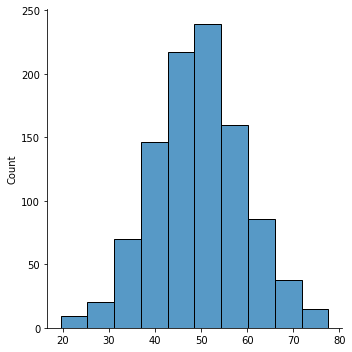

In [1]:
# この後の検証のために，ガウス分布から乱数生成して予め母分散が分かるようにしておく
import numpy as np
import seaborn as sns

np.random.seed(0)
datasets  = np.random.normal(50, 10, (1000))

sns.displot(datasets, bins=10)

In [2]:
# 標本分散
np.var(datasets)

97.42344563121543

In [3]:
# 不偏分散(こちらの方が母分散100に近い値)
np.var(datasets, ddof=1)

97.52096659781326

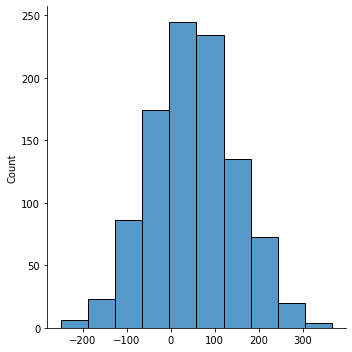

In [4]:
# 母分散の異なる別のデータでも試す
datasets  = np.random.normal(50, 100, (1000))

sns.displot(datasets, bins=10)

In [5]:
# 標本分散
np.var(datasets)

9373.337542827796

In [6]:
# 不偏分散
np.var(datasets, ddof=1)

9382.720263090887

## 標準偏差
---
標準偏差は先述の分散の平方根，すなわち$s$で表される統計量である．分散と同様にデータのバラツキ具合を表す．母集団の標準偏差の場合には$\sigma$と表されることが多い．

標準偏差の解釈の一つは「平均値からの差(偏差)が，平均的にどのくらいなのか表したもの」である．平方根をを取ることで，元のデータとの単位が同じものになるため，理解しやすいというメリットがある．

また，データの値が正規分布に従う場合，標準偏差(とその倍数)は特別な意味を持つ．例えば，平均0の正規分布において確率変数の値が$0\pm\sigma$の範囲に収まる確率は68.2%であり，$0\pm2\sigma$の範囲に収まる確率は95.4%である．

### 不偏標準偏差
不偏標準偏差は不偏分散の平方根である．ただ，どの統計量を不偏標準偏差とみなすか，人によって主張が異なる．というのも，冒頭の定義では母標準偏差の不偏推定量になっていないからである．母分散の不偏推定量である不偏分散の平方根を取ったからといって，それが母標準偏差の不偏推定量になるわけではない．母標準偏差の不偏推定量を不偏標準偏差と呼ぶ場合もある．

### 偏差値
### 変動係数
### Numpyを用いたシミュレーション

## 四分位
---
## パーセンタイル
---

## 参考文献
---

[分散, 日経リサーチ](https://www.nikkei-r.co.jp/glossary/id=1657)

[分散(統計学), Wikipedia](https://ja.wikipedia.org/wiki/%E5%88%86%E6%95%A3_(%E7%B5%B1%E8%A8%88%E5%AD%A6))

[6-1.分散, 統計WEB](https://bellcurve.jp/statistics/course/5919.html)

[統計学における分散とは？不偏分散との違いも！ 例題でわかりやすく解説, AVILEN AI Trend](https://ai-trend.jp/basic-study/basic/variance/)

[分散（Variance）／標準偏差（SD：Standard Deviation）とは？, ITMedia](https://atmarkit.itmedia.co.jp/ait/articles/2109/22/news035.html)

[numpy.random.normal, SciPy.org](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.random.normal.html#numpy.random.normal)

[seaborn.diaplot, seaborn](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot)

[numpy.var, NumPy](https://numpy.org/doc/stable/reference/generated/numpy.var.html)

[標準偏差, Wikipedia](https://ja.wikipedia.org/wiki/%E6%A8%99%E6%BA%96%E5%81%8F%E5%B7%AE)

[標準偏差とは？意味から求め方、分散との違いまでわかりやすく解説, DATA VIZ LAB](https://data-viz-lab.com/standarddeviation)